In [63]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

!pip install mplfinance

# Clave de API de Twelve Data (reemplaza con tu clave)
api_key = '26e35c602a5f48039ffbb3e024f1b9e1'

# URL para obtener datos de la paridad EUR/USD usando la API de Twelve Data
url = 'https://api.twelvedata.com/time_series'

# Parámetros de la consulta
params = {
    'symbol': 'EUR/USD',
    'interval': '1day',           # Intervalo de tiempo de los datos (diario para una mayor cantidad de tiempo)
    'apikey': api_key,
    'outputsize': 5000            # Máxima cantidad de puntos de datos a obtener
}

# Realizar la solicitud a la API
response = requests.get(url, params=params)

# Verificar si la solicitud fue exitosa
if response.status_code == 200:
    # Convertir la respuesta a JSON
    data = response.json()

    # Verificar si la respuesta contiene los datos esperados
    if "values" in data:
        # Crear un DataFrame a partir de los valores obtenidos
        time_series = data["values"]
        df = pd.DataFrame(time_series)

        # Convertir la columna 'datetime' a tipo datetime y ordenar el DataFrame
        df['datetime'] = pd.to_datetime(df['datetime'])
        df = df.sort_values(by='datetime')

        # Convertir las columnas de precios a tipo float
        df['open'] = df['open'].astype(float)
        df['high'] = df['high'].astype(float)
        df['low'] = df['low'].astype(float)
        df['close'] = df['close'].astype(float)

        # Establecer 'datetime' como el índice del DataFrame
        df.set_index('datetime', inplace=True)
    else:
        print(f"Error en la respuesta: {data.get('message', 'No se encontraron datos disponibles.')}")
else:
    print(f"Error al obtener los datos: {response.status_code}")


               open     high      low    close
datetime                                      
2005-10-17  1.20700  1.21211  1.20100  1.20110
2005-10-18  1.20130  1.20179  1.19229  1.19550
2005-10-19  1.19524  1.20021  1.18820  1.19740
2005-10-20  1.19710  1.20250  1.19540  1.20179
2005-10-21  1.20189  1.20750  1.19360  1.19540


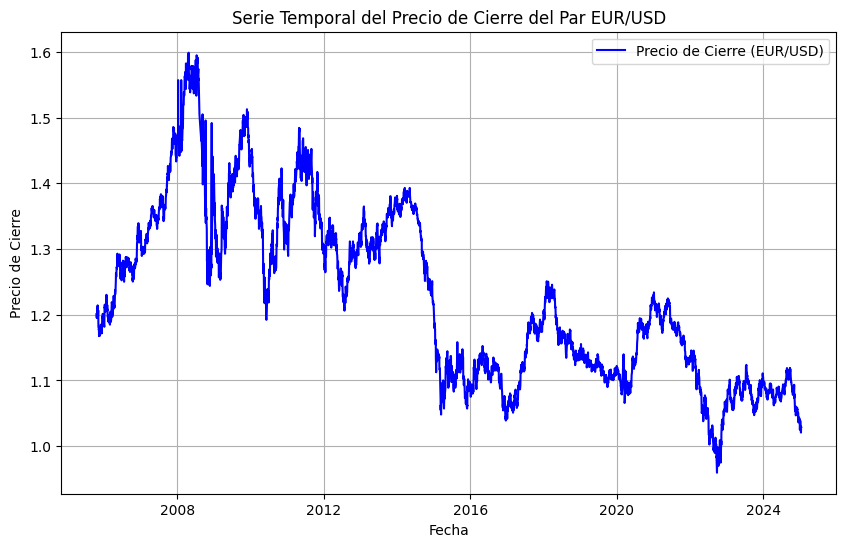

In [64]:
# Mostrar las primeras filas del DataFrame
print(df.head())

# Graficar la serie temporal del precio de cierre
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['close'], label='Precio de Cierre (EUR/USD)', color='b')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.title('Serie Temporal del Precio de Cierre del Par EUR/USD')
plt.legend()
plt.grid()
plt.show()


In [65]:
print(df)

                open     high      low     close
datetime                                        
2005-10-17  1.207000  1.21211  1.20100  1.201100
2005-10-18  1.201300  1.20179  1.19229  1.195500
2005-10-19  1.195240  1.20021  1.18820  1.197400
2005-10-20  1.197100  1.20250  1.19540  1.201790
2005-10-21  1.201890  1.20750  1.19360  1.195400
...              ...      ...      ...       ...
2025-01-10  1.029822  1.03123  1.02106  1.024557
2025-01-11  1.024600  1.02495  1.02366  1.024520
2025-01-13  1.024230  1.02505  1.01768  1.020730
2025-01-14  1.020720  1.03060  1.02067  1.029760
2025-01-15  1.029840  1.03549  1.02584  1.029130

[5000 rows x 4 columns]


In [66]:
import pandas as pd

# Convertir índice a datetime
if not pd.api.types.is_datetime64_any_dtype(df.index):
    df.index = pd.to_datetime(df.index)

# Obtener el precio máximo y mínimo por año
max_por_ano = df['high'].resample('YE').max()
min_por_ano = df['low'].resample('YE').min()

# Crear una tabla con los resultados
tabla_resumen = pd.DataFrame({
    'Fecha': max_por_ano.index.strftime('%Y'),  # Convertir la fecha al formato de año
    'Precio Máximo': max_por_ano.values,
    'Precio Mínimo': min_por_ano.values
})

# Mostrar la tabla
print("Tabla de precios máximos y mínimos por año:")
print(tabla_resumen)


Tabla de precios máximos y mínimos por año:
   Fecha  Precio Máximo  Precio Mínimo
0   2005        1.21720       1.164850
1   2006        1.34300       1.181500
2   2007        1.49571       1.287100
3   2008        1.60282       1.234290
4   2009        1.51453       1.246900
5   2010        1.45770       1.188200
6   2011        1.49381       1.286120
7   2012        1.34862       0.760572
8   2013        1.38835       1.274980
9   2014        1.39911       1.210540
10  2015        1.20986       1.048163
11  2016        1.16140       1.035518
12  2017        1.20934       1.034768
13  2018        1.25581       1.122320
14  2019        1.15714       1.088151
15  2020        1.23095       1.065451
16  2021        1.23503       1.118780
17  2022        1.14943       0.954016
18  2023        1.12757       1.044987
19  2024        1.12124       1.033987
20  2025        1.04373       1.017680


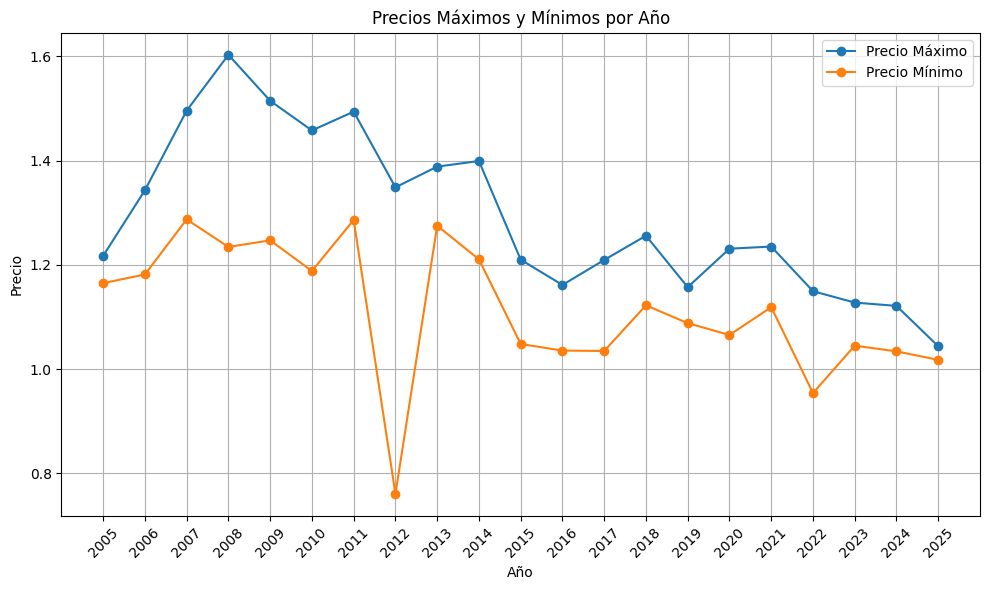

In [67]:
#  Gráfico con Precio máximo y mínimo por año
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.ticker as ticker

# Optional: Plotting the data for visualization
plt.figure(figsize=(10, 6))
plt.plot(resumen_ano['Año'], resumen_ano['Precio Máximo'], label='Precio Máximo', marker='o')
plt.plot(resumen_ano['Año'], resumen_ano['Precio Mínimo'], label='Precio Mínimo', marker='o')
plt.title('Precios Máximos y Mínimos por Año')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.xticks(resumen_ano['Año'], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [58]:
import requests
import json
import pandas as pd
from google.colab import files
from datetime import datetime, timedelta

# Clave de API de Twelve Data (reemplaza con tu clave)
api_key = '26e35c602a5f48039ffbb3e024f1b9e1'

# URL para obtener datos de la paridad EUR/USD usando la API de Twelve Data
url = 'https://api.twelvedata.com/time_series'

# Función para obtener datos en intervalos específicos
def fetch_data_in_chunks(symbol, interval, start_date, end_date, api_key):
    all_data = []
    current_start = start_date

    while current_start < end_date:
        current_end = min(current_start + timedelta(days=500), end_date)  # Dividir en intervalos de 500 días
        params = {
            'symbol': symbol,
            'interval': interval,
            'apikey': api_key,
            'start_date': current_start.strftime('%Y-%m-%d'),
            'end_date': current_end.strftime('%Y-%m-%d'),
        }

        response = requests.get(url, params=params)

        if response.status_code != 200:
            print(f"Error al obtener los datos: {response.status_code}")
            break

        data = response.json()
        if "values" in data:
            all_data.extend(data["values"])
            print(f"Datos obtenidos: {current_start.strftime('%Y-%m-%d')} - {current_end.strftime('%Y-%m-%d')}")
        else:
            print(f"Error en la respuesta: {data.get('message', 'No se encontraron datos disponibles.')}")
            break

        current_start = current_end + timedelta(days=1)

    return all_data

# Función para determinar la sesión de trading
def determine_session(hour):
    if 0 <= hour < 8:
        return 'Asia'
    elif 8 <= hour < 16:
        return 'Londres'
    elif 16 <= hour < 24:
        return 'New York'
    else:
        return 'Desconocida'

# Configuración de parámetros
symbol = 'EUR/USD'
interval = '1h'
start_date = datetime(2020, 1, 1)
end_date = datetime.now()

# Obtener los datos
all_time_series = fetch_data_in_chunks(symbol, interval, start_date, end_date, api_key)

# Verificar si se obtuvieron datos
if all_time_series:
    # Crear un DataFrame a partir de los valores obtenidos
    df = pd.DataFrame(all_time_series)

    # Convertir la columna 'datetime' a tipo datetime y ordenar el DataFrame
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.sort_values(by='datetime')

    # Convertir las columnas de precios a tipo float
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)

    # Añadir la columna de sesión de trading
    df['session'] = df['datetime'].dt.hour.apply(determine_session)

    # Establecer 'datetime' como el índice del DataFrame
    df.set_index('datetime', inplace=True)

    # Exportar a un archivo CSV
    csv_file = 'EURUSD_hourly_data_with_sessions.csv'
    df.to_csv(csv_file)
    print(f"Datos exportados a {csv_file}")

    # Descargar el archivo CSV
    files.download(csv_file)
else:
    print("No se obtuvieron datos para procesar.")


Datos obtenidos: 2020-01-01 - 2021-05-15
Datos obtenidos: 2021-05-16 - 2022-09-28
Datos obtenidos: 2022-09-29 - 2024-02-11
Datos obtenidos: 2024-02-12 - 2025-01-15
Datos exportados a EURUSD_hourly_data_with_sessions.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
import requests
import json
import pandas as pd
from google.colab import files
from datetime import datetime, timedelta

# Clave de API de Twelve Data (reemplaza con tu clave)
api_key = '26e35c602a5f48039ffbb3e024f1b9e1'

# URL para obtener datos de la paridad GOLD/USD usando la API de Twelve Data
url = 'https://api.twelvedata.com/time_series'

# Función para obtener datos en intervalos específicos
def fetch_data_in_chunks(symbol, interval, start_date, end_date, api_key):
    all_data = []
    current_start = start_date

    while current_start < end_date:
        current_end = min(current_start + timedelta(days=500), end_date)  # Dividir en intervalos de 500 días
        params = {
            'symbol': symbol,
            'interval': interval,
            'apikey': api_key,
            'start_date': current_start.strftime('%Y-%m-%d'),
            'end_date': current_end.strftime('%Y-%m-%d'),
        }

        response = requests.get(url, params=params)

        if response.status_code != 200:
            print(f"Error al obtener los datos: {response.status_code}")
            break

        data = response.json()
        if "values" in data:
            all_data.extend(data["values"])
            print(f"Datos obtenidos: {current_start.strftime('%Y-%m-%d')} - {current_end.strftime('%Y-%m-%d')}")
        else:
            print(f"Error en la respuesta: {data.get('message', 'No se encontraron datos disponibles.')}")
            break

        current_start = current_end + timedelta(days=1)

    return all_data

# Función para determinar la sesión de trading
def determine_session(hour):
    if 0 <= hour < 8:
        return 'Asia'
    elif 8 <= hour < 16:
        return 'Londres'
    elif 16 <= hour < 24:
        return 'New York'
    else:
        return 'Desconocida'

# Configuración de parámetros
symbol = 'XAU/USD'
interval = '1h'
start_date = datetime(2020, 1, 1)
end_date = datetime.now()

# Obtener los datos
all_time_series = fetch_data_in_chunks(symbol, interval, start_date, end_date, api_key)

# Verificar si se obtuvieron datos
if all_time_series:
    # Crear un DataFrame a partir de los valores obtenidos
    df = pd.DataFrame(all_time_series)

    # Convertir la columna 'datetime' a tipo datetime y ordenar el DataFrame
    df['datetime'] = pd.to_datetime(df['datetime'])
    df = df.sort_values(by='datetime')

    # Convertir las columnas de precios a tipo float
    df['open'] = df['open'].astype(float)
    df['high'] = df['high'].astype(float)
    df['low'] = df['low'].astype(float)
    df['close'] = df['close'].astype(float)

    # Añadir la columna de sesión de trading
    df['session'] = df['datetime'].dt.hour.apply(determine_session)

    # Establecer 'datetime' como el índice del DataFrame
    df.set_index('datetime', inplace=True)

    # Exportar a un archivo CSV
    csv_file = 'GOLDUSD_hourly_data_with_sessions.csv'
    df.to_csv(csv_file)
    print(f"Datos exportados a {csv_file}")

    # Descargar el archivo CSV
    files.download(csv_file)
else:
    print("No se obtuvieron datos para procesar.")


Error en la respuesta: **symbol** XAU/USD is not available with your plan. You may select the appropriate plan at https://twelvedata.com/pricing
No se obtuvieron datos para procesar.


KeyError: 'rsi'

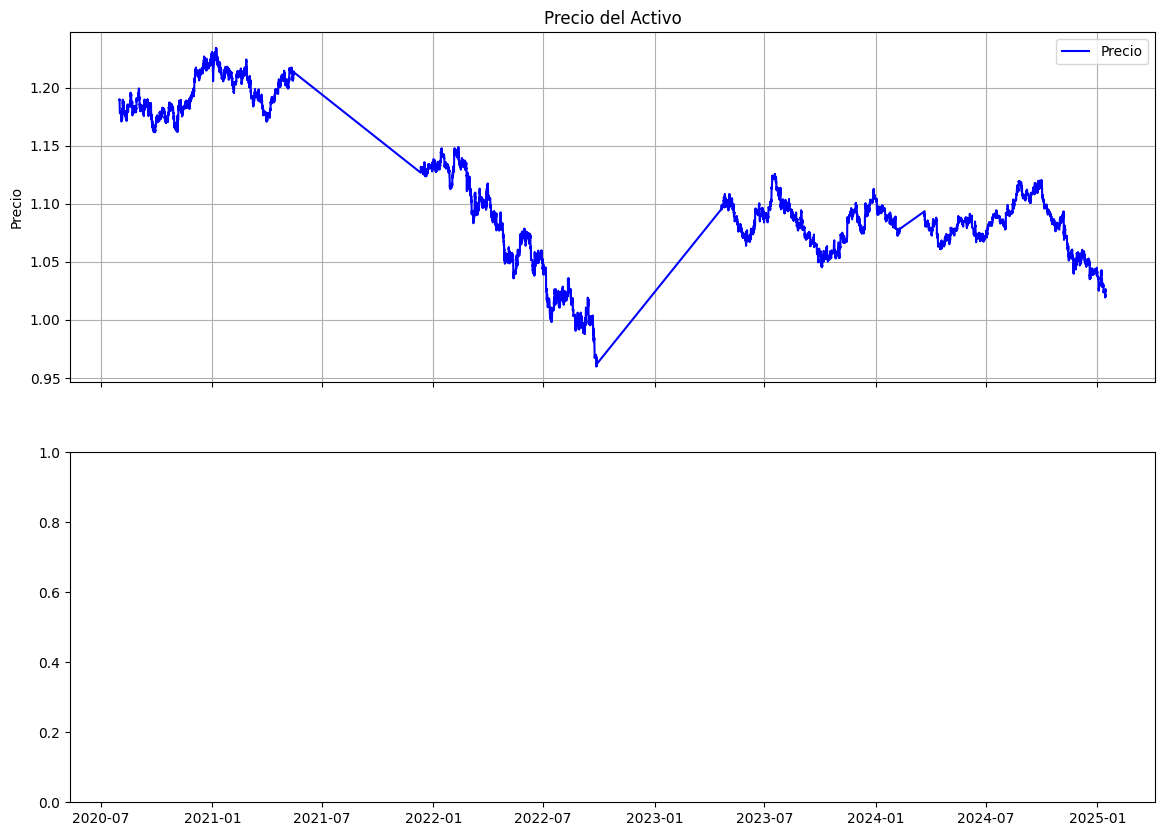

In [60]:
import matplotlib.pyplot as plt

def plot_price_and_rsi(data, price_column='close', rsi_column='rsi'):
    """
    Grafica el precio y el RSI de un DataFrame.

    Args:
        data (pd.DataFrame): DataFrame con las columnas de precios y RSI.
        price_column (str): Nombre de la columna de precios.
        rsi_column (str): Nombre de la columna del RSI.
    """
    fig, ax = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

    # Subgráfico 1: Precio
    ax[0].plot(data.index, data[price_column], label='Precio', color='blue')
    ax[0].set_title('Precio del Activo')
    ax[0].set_ylabel('Precio')
    ax[0].legend()
    ax[0].grid()

    # Subgráfico 2: RSI
    ax[1].plot(data.index, data[rsi_column], label='RSI', color='green')
    ax[1].axhline(70, color='red', linestyle='--', label='Sobrecompra (70)')
    ax[1].axhline(30, color='blue', linestyle='--', label='Sobreventa (30)')
    ax[1].set_title('RSI (Índice de Fuerza Relativa)')
    ax[1].set_ylabel('RSI')
    ax[1].set_xlabel('Fecha')
    ax[1].legend()
    ax[1].grid()

    plt.tight_layout()
    plt.show()

plot_price_and_rsi(df)

Axes(0.125,0.11;0.775x0.77)


AttributeError: 'PlotAccessor' object has no attribute 'stacked_bar'

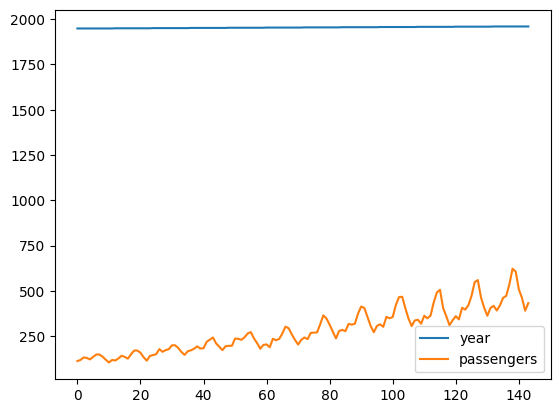

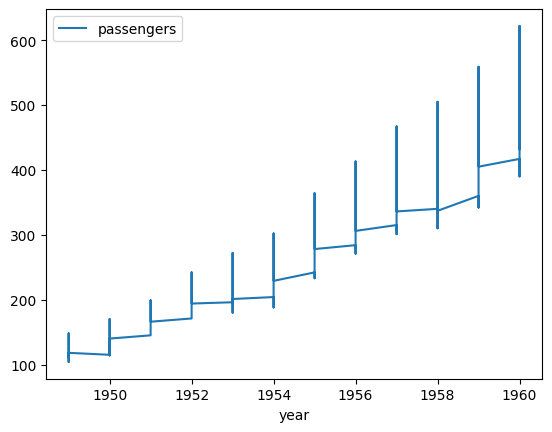

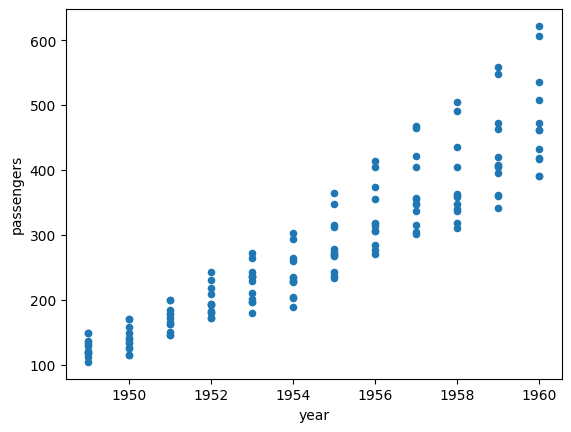

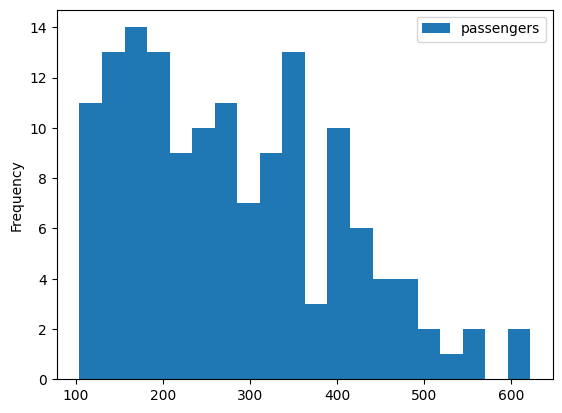

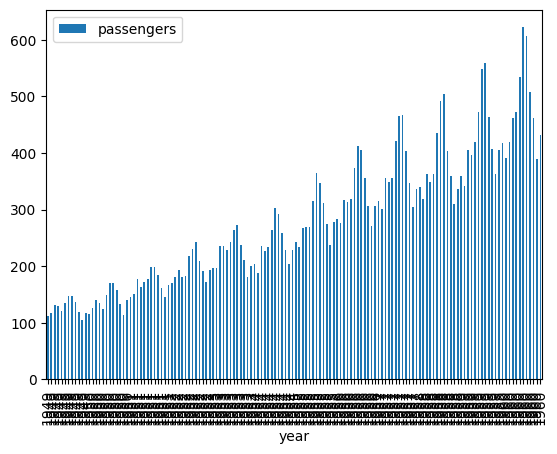

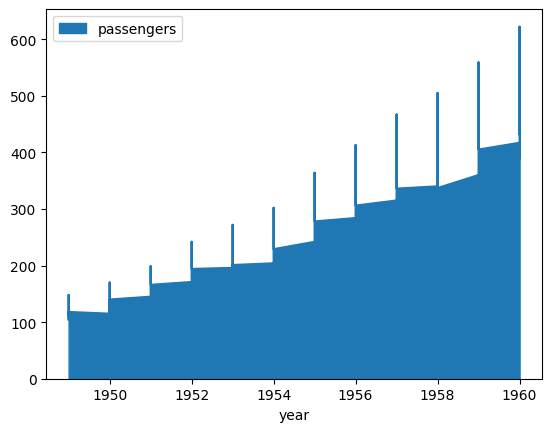

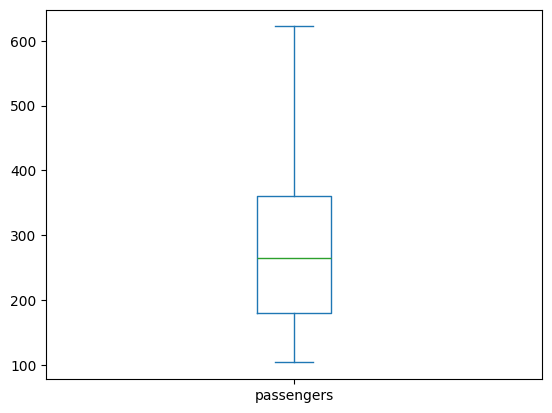

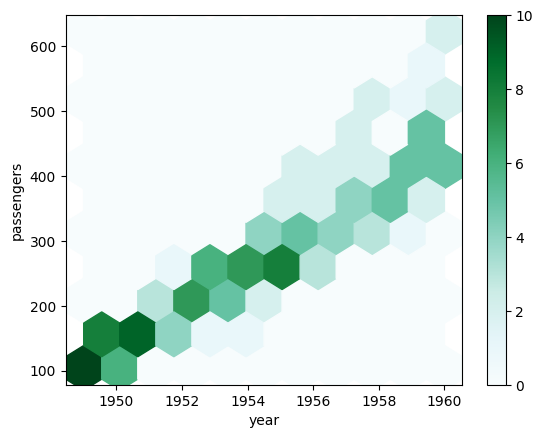

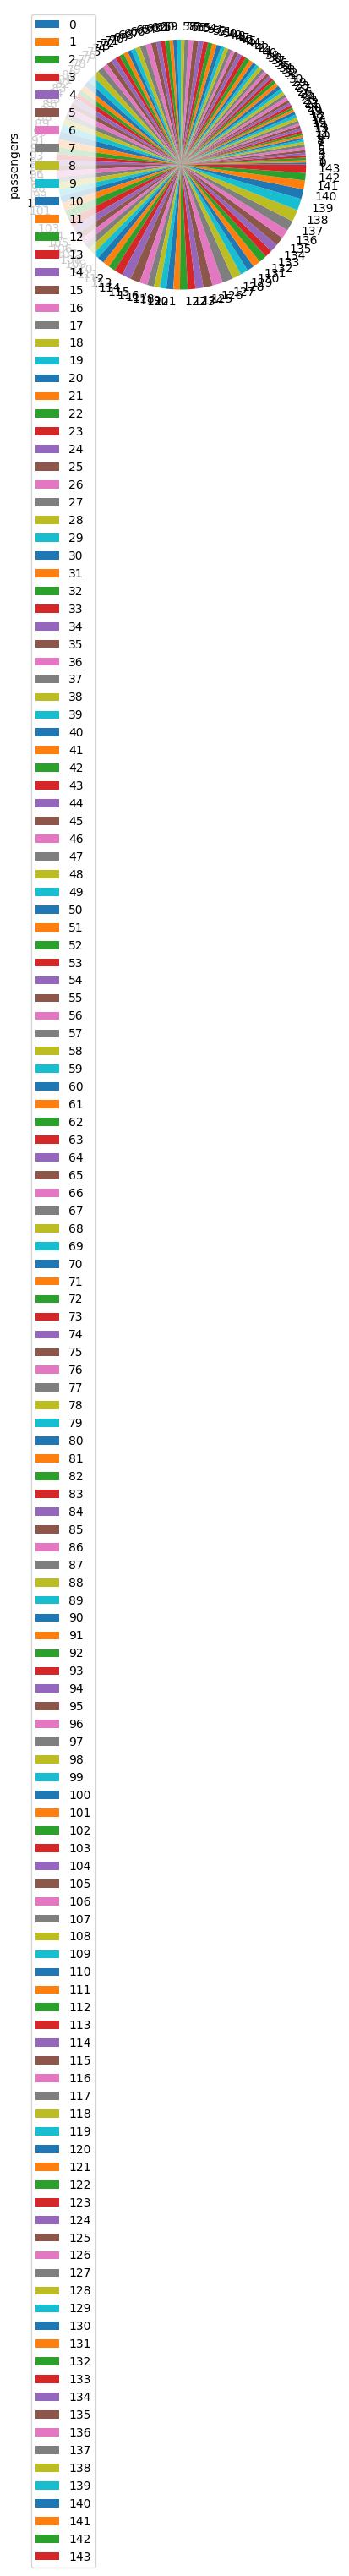

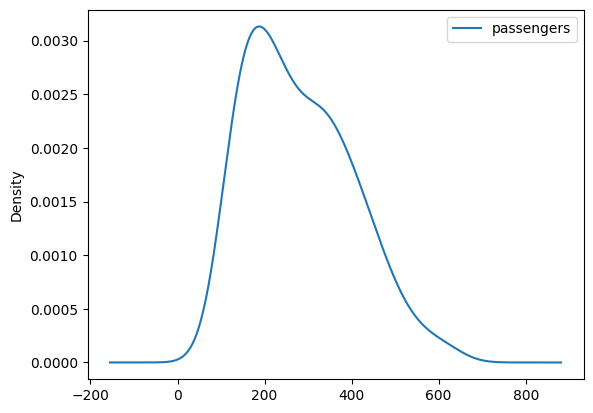

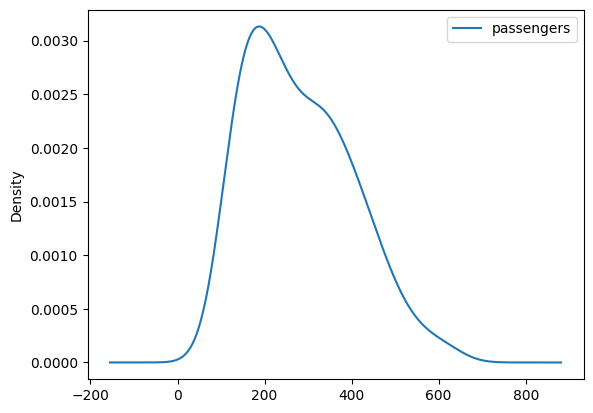

In [18]:
import seaborn as sns
import pandas as pd

# Cargar dataset de vuelos
df = sns.load_dataset('flights')

# Crear 12 gráficos con una sola línea cada uno
print(df.plot())  # Gráfico por defecto
df.plot.line(x='year', y='passengers')  # Línea
df.plot.scatter(x='year', y='passengers')  # Dispersión
df.plot.hist(y='passengers', bins=20)  # Histograma
df.plot.bar(x='year', y='passengers')  # Barras
df.plot.area(x='year', y='passengers')  # Área
df.plot.box(y='passengers')  # Caja y bigotes
df.plot.hexbin(x='year', y='passengers', gridsize=10)  # Hexbin
df.plot.pie(y='passengers')  # Circular
df.plot.density(y='passengers')  # Densidad
df.plot.kde(y='passengers')  # Estimación kernel
df.plot.stacked_bar()  # Gráfico de barras apiladas



Resumen descriptivo del DataFrame:
              open         high          low        close
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      1.226596     1.231033     1.222007     1.226615
std       0.133505     0.134328     0.132839     0.133507
min       0.959619     0.967006     0.760572     0.959619
25%       1.111295     1.115023     1.107518     1.111360
50%       1.200300     1.204700     1.195555     1.200025
75%       1.332390     1.337200     1.327025     1.332218
max       1.598180     1.602820     1.587400     1.598800


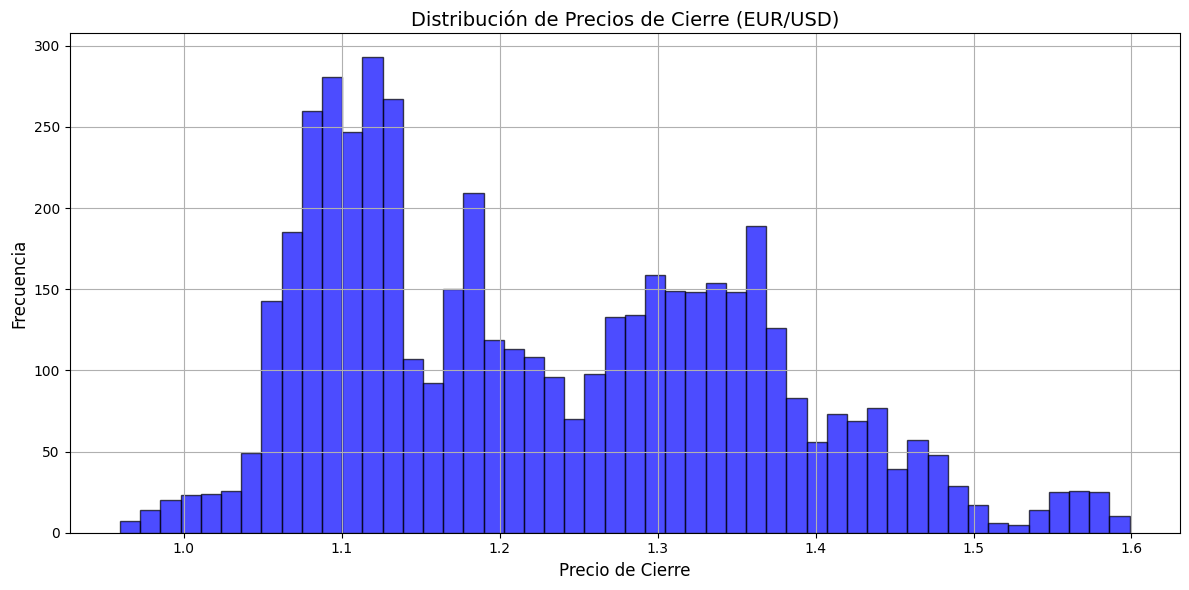


Matriz de correlación entre precios:
           open      high       low     close
open   1.000000  0.999446  0.997761  0.999457
high   0.999446  1.000000  0.997513  0.999457
low    0.997761  0.997513  1.000000  0.997762
close  0.999457  0.999457  0.997762  1.000000


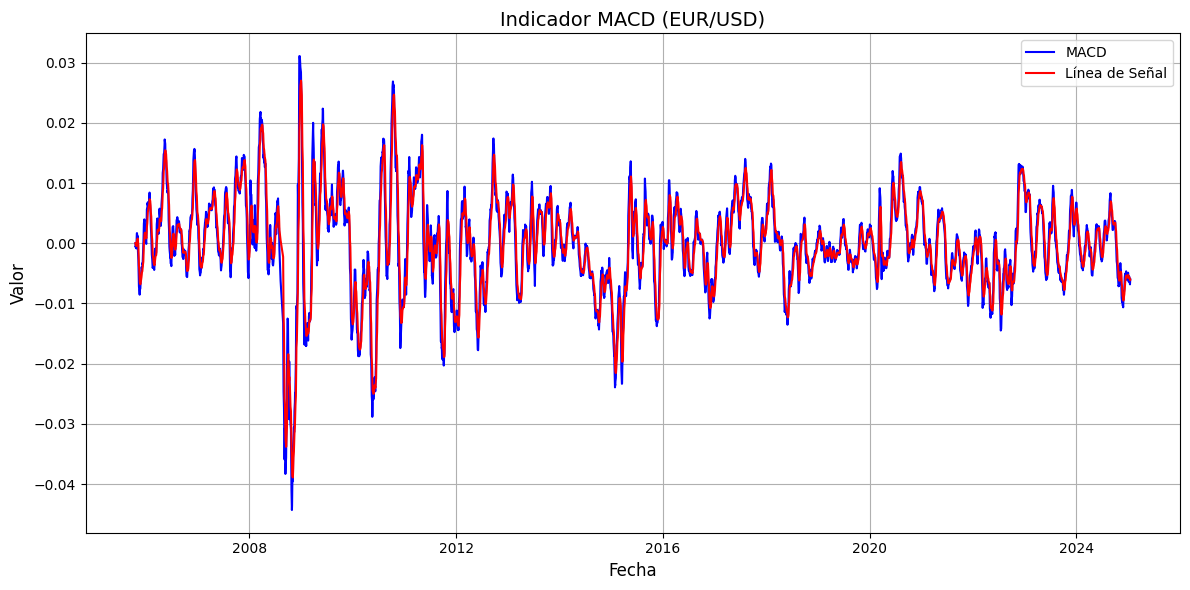

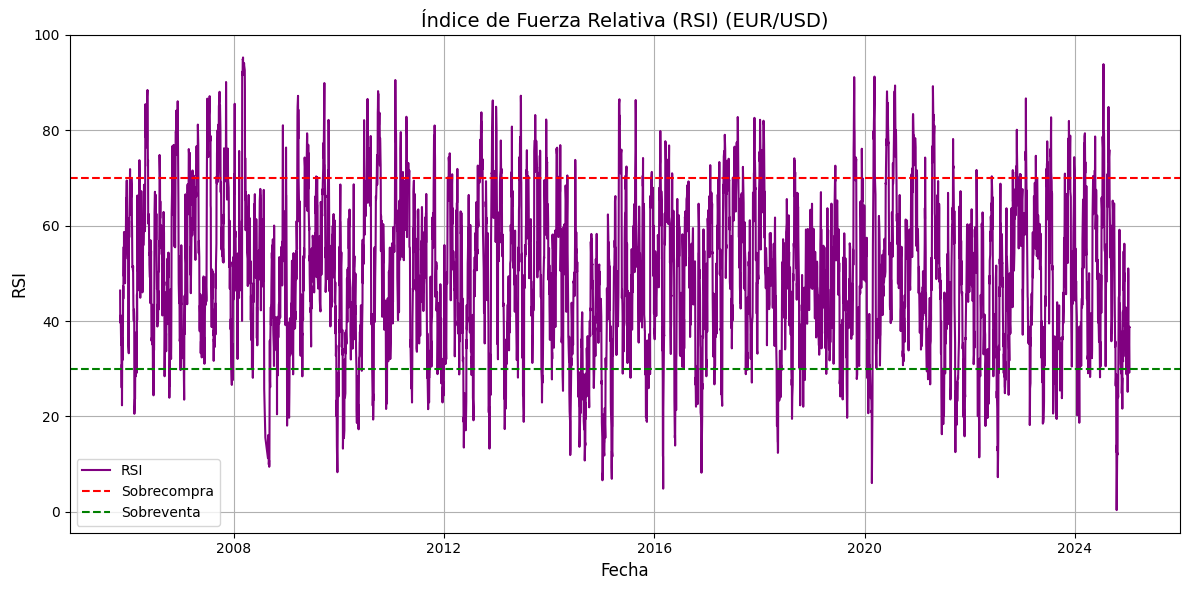

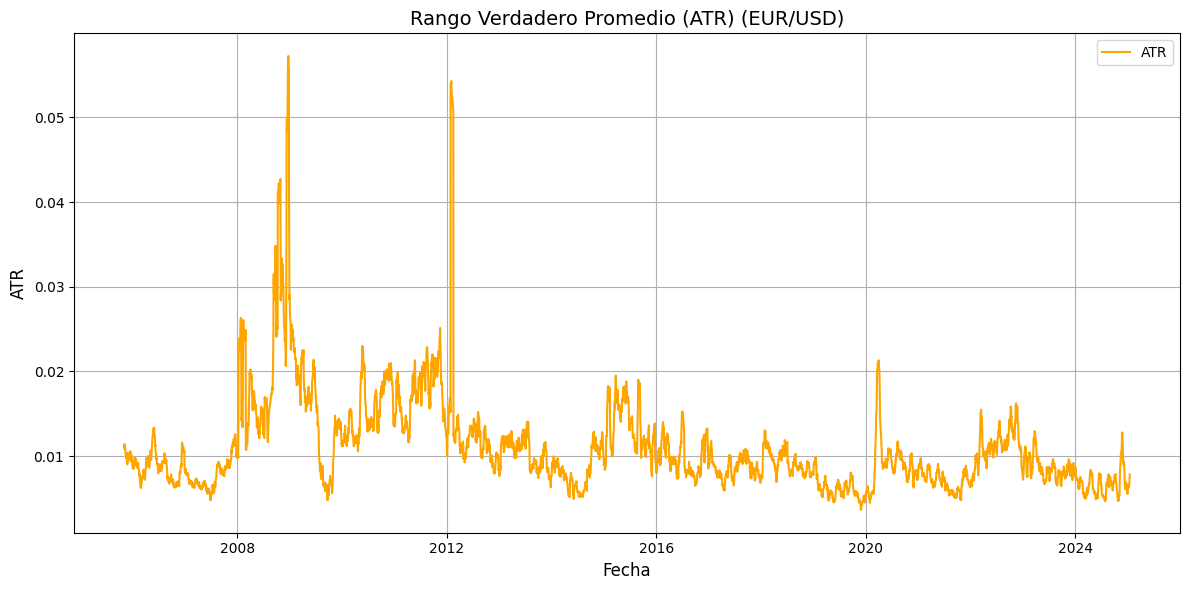

Los datos procesados se han exportado a /content/EUR_USD_Analisis.csv


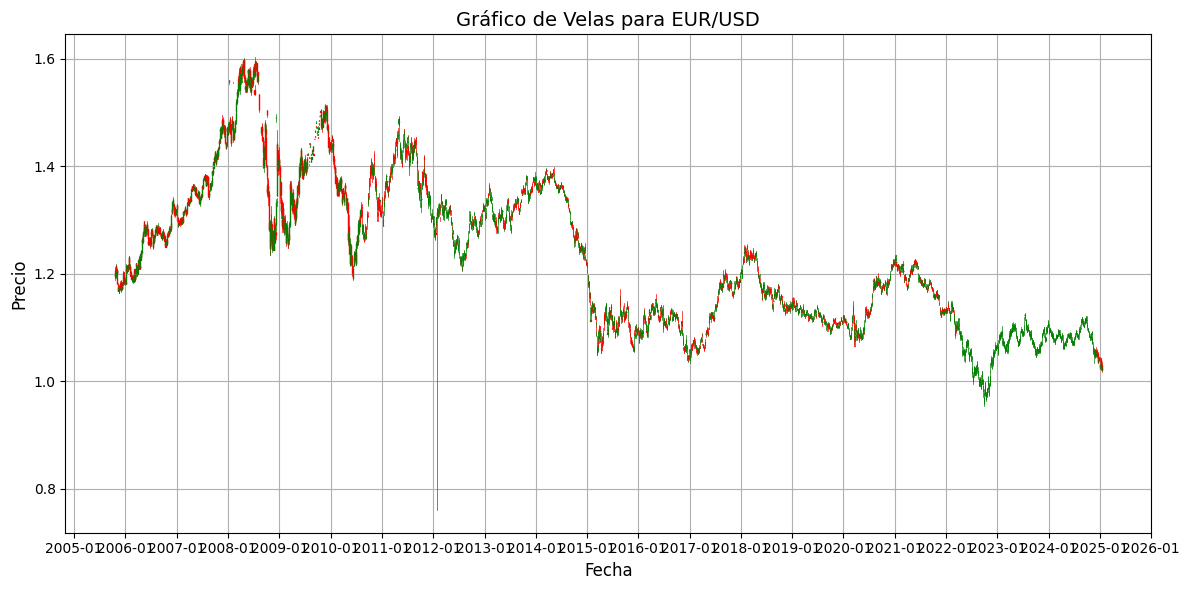

In [71]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np

# Instalación de librerías necesarias (comentar si ya están instaladas)
# !pip install mplfinance
# !pip install yfinance

# ===================================
# Configuración inicial
# ===================================
# Clave de API de Twelve Data (asegúrate de reemplazarla con tu clave válida)
API_KEY = '26e35c602a5f48039ffbb3e024f1b9e1'

# Endpoint de la API de Twelve Data
URL = 'https://api.twelvedata.com/time_series'

# Parámetros de la consulta
PARAMS = {
    'symbol': 'EUR/USD',       # Par de divisas
    'interval': '1day',        # Intervalo de tiempo (diario)
    'apikey': API_KEY,         # Clave de la API
    'outputsize': 5000         # Máxima cantidad de puntos a obtener
}

# ===================================
# Obtención de datos
# ===================================
response = requests.get(URL, params=PARAMS)

if response.status_code == 200:
    data = response.json()
    if "values" in data:
        # Crear un DataFrame a partir de los datos obtenidos
        time_series = data["values"]
        df = pd.DataFrame(time_series)

        # Procesamiento del DataFrame
        df['datetime'] = pd.to_datetime(df['datetime'])  # Convertir a datetime
        df = df.sort_values(by='datetime')  # Ordenar por fecha

        # Convertir precios a tipo float
        price_columns = ['open', 'high', 'low', 'close']
        for col in price_columns:
            df[col] = df[col].astype(float)

        # Establecer la columna 'datetime' como índice
        df.set_index('datetime', inplace=True)
    else:
        print(f"Error en la respuesta: {data.get('message', 'No se encontraron datos disponibles.')}")
        exit()
else:
    print(f"Error al obtener los datos: {response.status_code}")
    exit()

# ===================================
# Análisis Exploratorio de Datos (EDA)
# ===================================
print("\nResumen descriptivo del DataFrame:")
print(df.describe())

# Distribución de precios de cierre
plt.figure(figsize=(12, 6))
plt.hist(df['close'], bins=50, color='blue', alpha=0.7, edgecolor='black')
plt.title('Distribución de Precios de Cierre (EUR/USD)', fontsize=14)
plt.xlabel('Precio de Cierre', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Visualización de la correlación entre precios
correlation_matrix = df[['open', 'high', 'low', 'close']].corr()
print("\nMatriz de correlación entre precios:")
print(correlation_matrix)

# ===================================
# Indicadores técnicos
# ===================================
# Media móvil convergencia/divergencia (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_short'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_long'] = data['close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

df = calculate_macd(df)

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

df = calculate_rsi(df)

# Average True Range (ATR)
def calculate_atr(data, window=14):
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())
    true_range = high_low.combine(high_close, max).combine(low_close, max)
    data['ATR'] = true_range.rolling(window=window).mean()
    return data

df = calculate_atr(df)

# ===================================
# Visualización de Indicadores Técnicos
# ===================================
# MACD
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Línea de Señal', color='red')
plt.title('Indicador MACD (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RSI
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Sobrecompra')
plt.axhline(30, color='green', linestyle='--', label='Sobreventa')
plt.title('Índice de Fuerza Relativa (RSI) (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ATR
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ATR'], label='ATR', color='orange')
plt.title('Rango Verdadero Promedio (ATR) (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===================================
# Exportar datos a CSV
# ===================================
output_file = '/content/EUR_USD_Analisis.csv'  # Ruta para Google Colab
df.to_csv(output_file)
print(f"Los datos procesados se han exportado a {output_file}")

# ===================================
# Generar gráfico de velas (Candlestick)
# ===================================
# Preparar datos para el gráfico de velas
ohlc = df[['open', 'high', 'low', 'close']].copy()
ohlc['datetime'] = mdates.date2num(df.index.to_pydatetime())  # Convertir fechas a números para matplotlib
ohlc = ohlc[['datetime', 'open', 'high', 'low', 'close']]

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.title('Gráfico de Velas para EUR/USD', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===================================
# Fin del análisis
# ===================================


# **VERSION FINAL  15-01-2024**


### Análisis de Calidad de los Datos ###

Valores nulos por columna:
open     0
high     0
low      0
close    0
dtype: int64

Número de filas duplicadas: 0

Filas con inconsistencias en precios: 0

Frecuencia temporal de los datos:
datetime
1 days     3986
3 days      990
2 days       18
4 days        3
8 days        1
18 days       1
Name: count, dtype: int64

### Estadísticas Descriptivas Ampliadas ###

Resumen descriptivo del DataFrame:
              open         high          low        close
count  5000.000000  5000.000000  5000.000000  5000.000000
mean      1.226596     1.231033     1.222007     1.226615
std       0.133505     0.134328     0.132839     0.133507
min       0.959619     0.967006     0.760572     0.959619
25%       1.111295     1.115023     1.107518     1.111360
50%       1.200300     1.204700     1.195555     1.200025
75%       1.332390     1.337200     1.327025     1.332218
max       1.598180     1.602820     1.587400     1.598800

Volatilidad diaria:
count    50

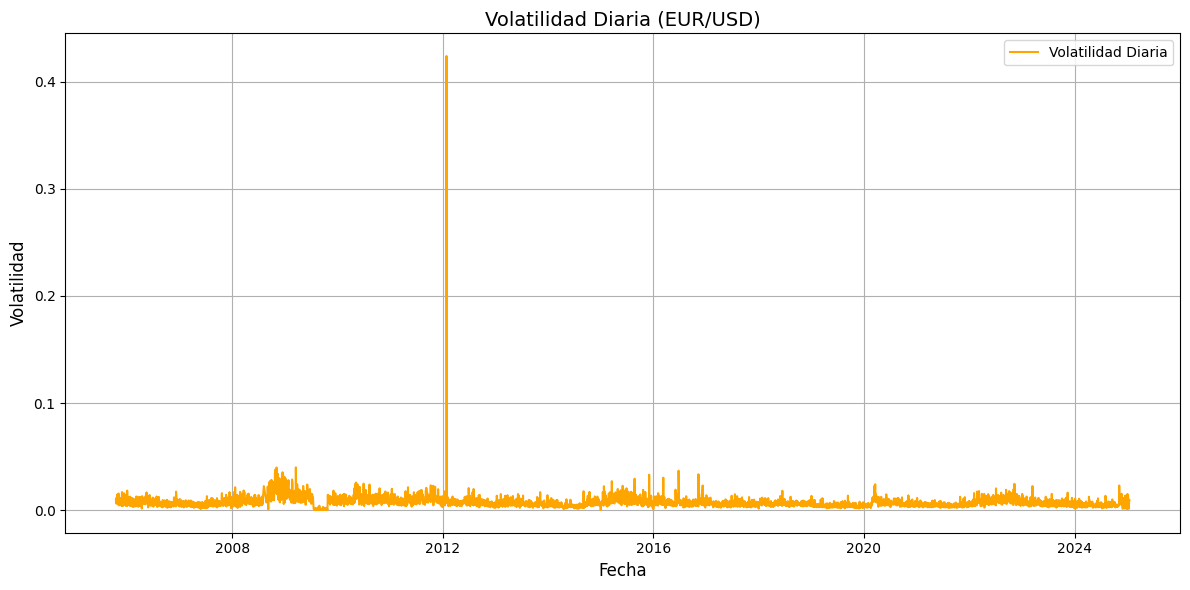


Tendencias Estacionales (Promedio Mensual de Precios):
mes         1         2         3         4         5         6         7   \
anio                                                                         
2005       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2006  1.211846  1.194563  1.203347  1.228412  1.276810  1.266636  1.269479   
2007  1.300116  1.308824  1.325342  1.351552  1.350963  1.342181  1.372427   
2008  1.475410  1.480834  1.552557  1.575691  1.557204  1.557110  1.574531   
2009  1.328926  1.280587  1.307117  1.320347  1.367161  1.401322  1.408028   
2010  1.427858  1.368162  1.357615  1.342914  1.252891  1.221185  1.280175   
2011  1.335317  1.365909  1.399900  1.443816  1.434419  1.439920  1.430421   
2012  1.290130  1.322752  1.321583  1.316682  1.282050  1.254150  1.230463   
2013  1.328366  1.336600  1.295984  1.301010  1.298526  1.319285  1.309124   
2014  1.363180  1.365286  1.382567  1.380623  1.374598  1.359689  1.355102   
2015  1.

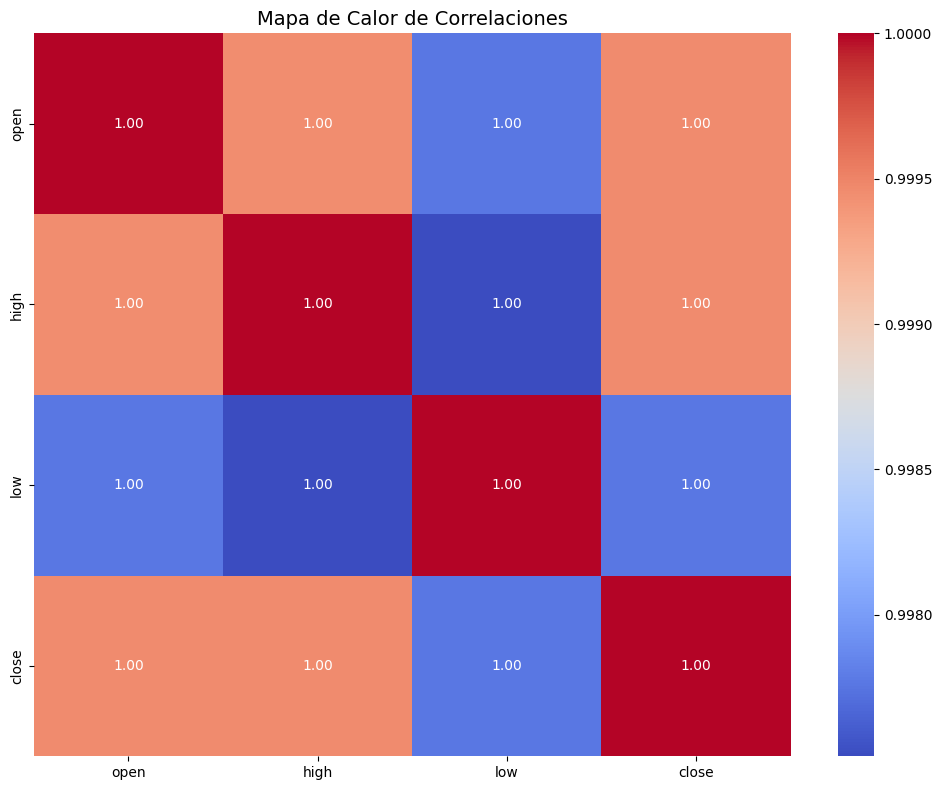

<ipython-input-72-dd98ac39aee7>:161: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.

<ipython-input-72-dd98ac39aee7>:162: FutureWarning:

'Y' is deprecated and will be removed in a future version, please use 'YE' instead.




Tabla de precios máximos y mínimos por año:
     Año  Precio Máximo  Precio Mínimo
0   2005        1.21720       1.164850
1   2006        1.34300       1.181500
2   2007        1.49571       1.287100
3   2008        1.60282       1.234290
4   2009        1.51453       1.246900
5   2010        1.45770       1.188200
6   2011        1.49381       1.286120
7   2012        1.34862       0.760572
8   2013        1.38835       1.274980
9   2014        1.39911       1.210540
10  2015        1.20986       1.048163
11  2016        1.16140       1.035518
12  2017        1.20934       1.034768
13  2018        1.25581       1.122320
14  2019        1.15714       1.088151
15  2020        1.23095       1.065451
16  2021        1.23503       1.118780
17  2022        1.14943       0.954016
18  2023        1.12757       1.044987
19  2024        1.12124       1.033987
20  2025        1.04373       1.017680
La tabla de máximos y mínimos por año se ha exportado a /content/Maximos_Minimos_Anuales.csv


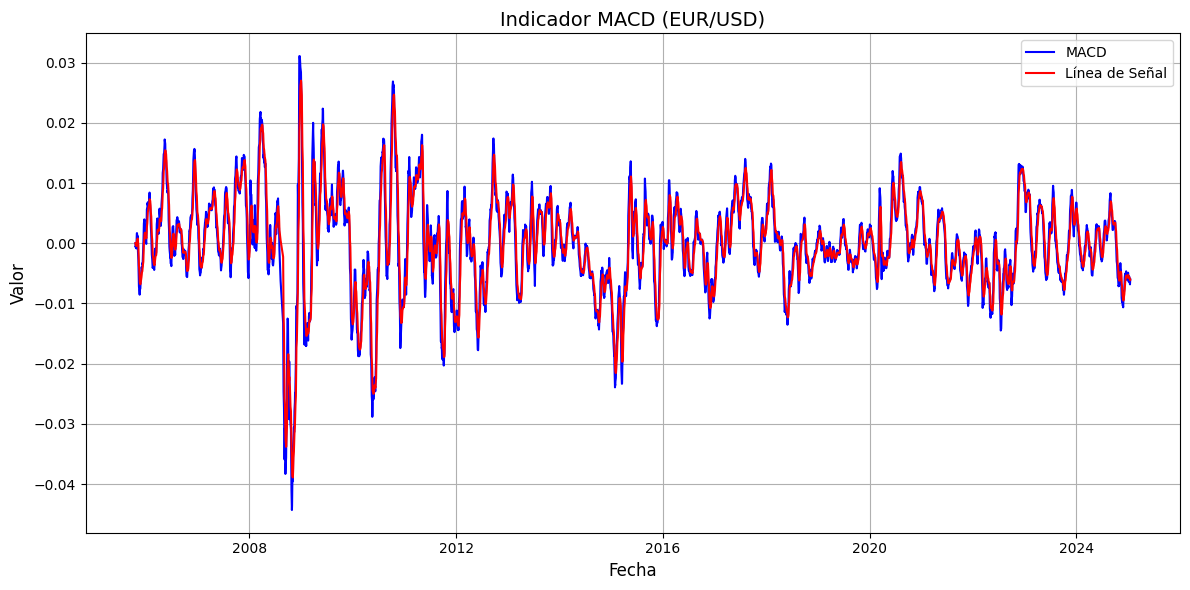

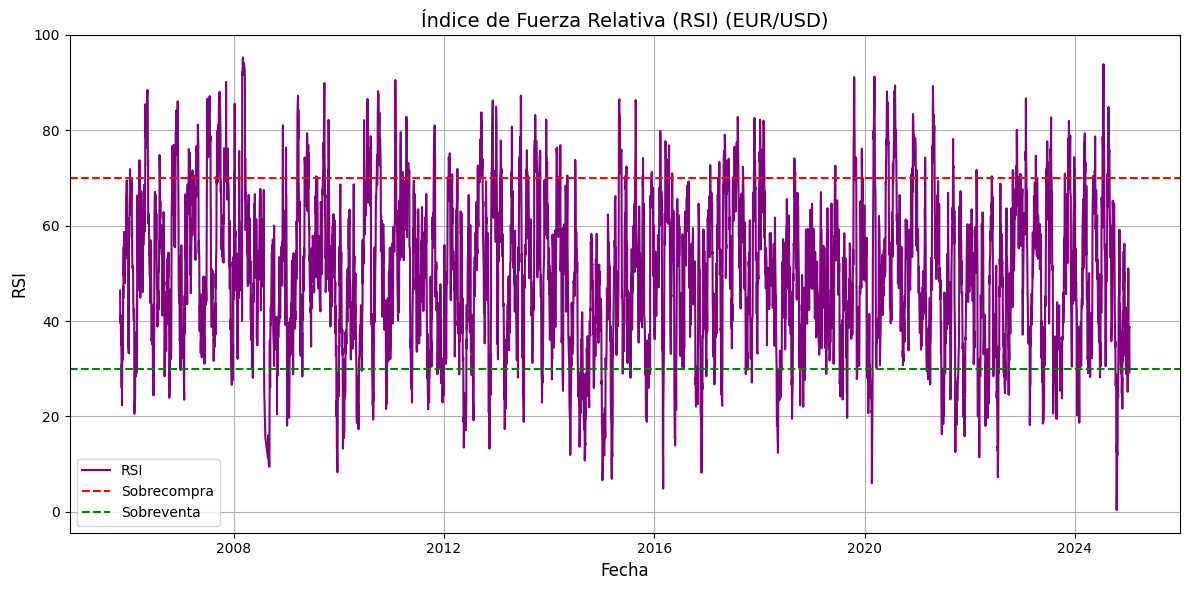

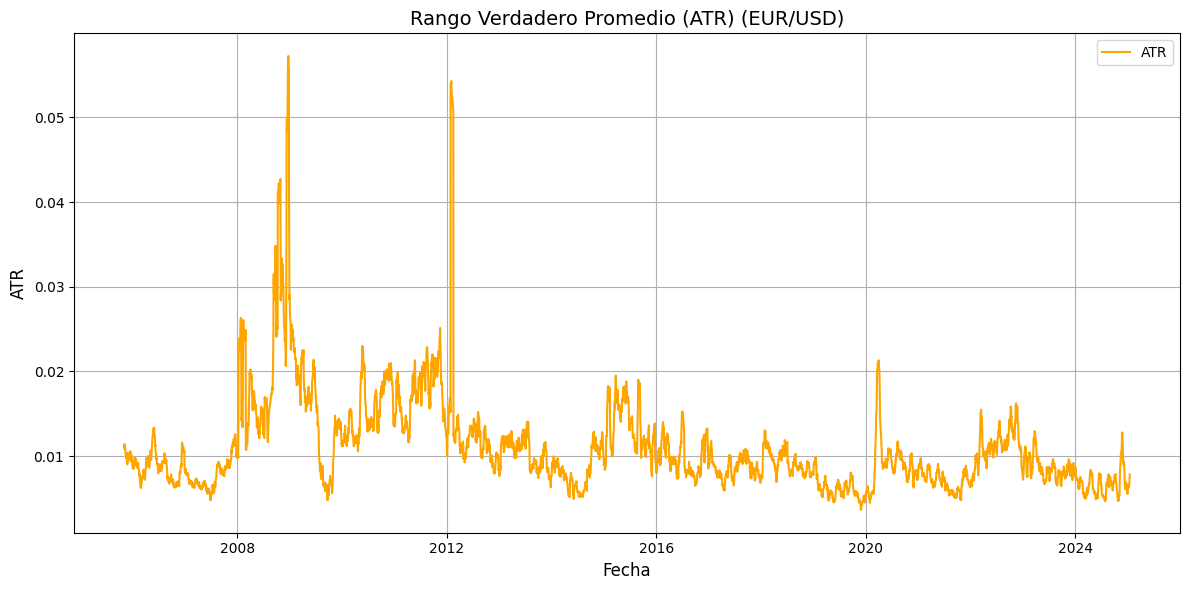

Los datos procesados se han exportado a /content/EUR_USD_Analisis.csv


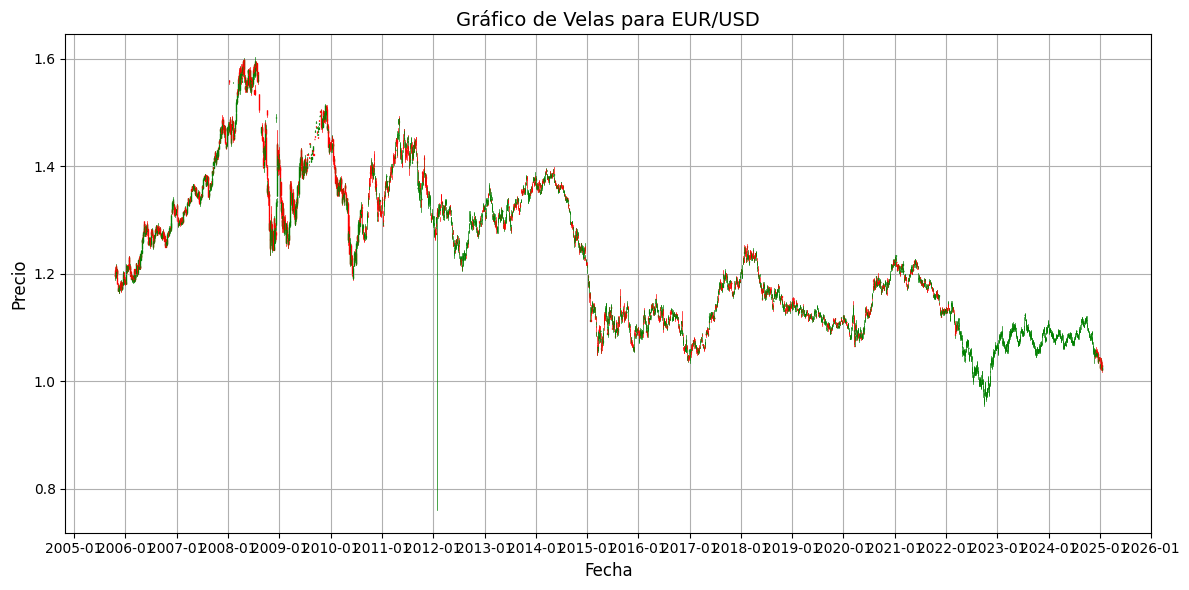

In [72]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc
import matplotlib.dates as mdates
import numpy as np

# Instalación de librerías necesarias (comentar si ya están instaladas)
# !pip install mplfinance
# !pip install yfinance

# ===================================
# Configuración inicial
# ===================================
# Clave de API de Twelve Data (asegúrate de reemplazarla con tu clave válida)
API_KEY = '26e35c602a5f48039ffbb3e024f1b9e1'

# Endpoint de la API de Twelve Data
URL = 'https://api.twelvedata.com/time_series'

# Parámetros de la consulta
PARAMS = {
    'symbol': 'EUR/USD',       # Par de divisas
    'interval': '1day',        # Intervalo de tiempo (diario)
    'apikey': API_KEY,         # Clave de la API
    'outputsize': 5000         # Máxima cantidad de puntos a obtener
}

# ===================================
# Obtención de datos
# ===================================
response = requests.get(URL, params=PARAMS)

if response.status_code == 200:
    data = response.json()
    if "values" in data:
        # Crear un DataFrame a partir de los datos obtenidos
        time_series = data["values"]
        df = pd.DataFrame(time_series)

        # Procesamiento del DataFrame
        df['datetime'] = pd.to_datetime(df['datetime'])  # Convertir a datetime
        df = df.sort_values(by='datetime')  # Ordenar por fecha

        # Convertir precios a tipo float
        price_columns = ['open', 'high', 'low', 'close']
        for col in price_columns:
            df[col] = df[col].astype(float)

        # Establecer la columna 'datetime' como índice
        df.set_index('datetime', inplace=True)
    else:
        print(f"Error en la respuesta: {data.get('message', 'No se encontraron datos disponibles.')}")
        exit()
else:
    print(f"Error al obtener los datos: {response.status_code}")
    exit()

# ===================================
# Análisis de Calidad de los Datos
# ===================================
print("\n### Análisis de Calidad de los Datos ###")

# Verificar valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Verificar datos duplicados
duplicados = df.duplicated().sum()
print(f"\nNúmero de filas duplicadas: {duplicados}")

# Verificar coherencia en precios
inconsistencias = df[(df['high'] < df['open']) | (df['high'] < df['close']) | (df['low'] > df['open']) | (df['low'] > df['close'])]
print(f"\nFilas con inconsistencias en precios: {len(inconsistencias)}")
if len(inconsistencias) > 0:
    print(inconsistencias)

# Verificar frecuencia temporal
frecuencia = df.index.to_series().diff().value_counts()
print("\nFrecuencia temporal de los datos:")
print(frecuencia)

# ===================================
# Análisis Estadístico Descriptivo Ampliado
# ===================================
print("\n### Estadísticas Descriptivas Ampliadas ###")

# Resumen estadístico
print("\nResumen descriptivo del DataFrame:")
print(df.describe())

# Volatilidad diaria
df['volatilidad_diaria'] = (df['high'] - df['low']) / df['close']
print("\nVolatilidad diaria:")
print(df['volatilidad_diaria'].describe())

# Gráfico de volatilidad diaria
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['volatilidad_diaria'], label='Volatilidad Diaria', color='orange')
plt.title('Volatilidad Diaria (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Volatilidad', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Estacionalidad
df['mes'] = df.index.month
df['anio'] = df.index.year
estacionalidad = df.groupby(['anio', 'mes'])['close'].mean().unstack()
print("\nTendencias Estacionales (Promedio Mensual de Precios):")
print(estacionalidad)

# Heatmap de correlación
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df[['open', 'high', 'low', 'close']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones', fontsize=14)
plt.tight_layout()
plt.show()

# ===================================
# Indicadores técnicos
# ===================================
# Media móvil convergencia/divergencia (MACD)
def calculate_macd(data, short_window=12, long_window=26, signal_window=9):
    data['EMA_short'] = data['close'].ewm(span=short_window, adjust=False).mean()
    data['EMA_long'] = data['close'].ewm(span=long_window, adjust=False).mean()
    data['MACD'] = data['EMA_short'] - data['EMA_long']
    data['Signal_Line'] = data['MACD'].ewm(span=signal_window, adjust=False).mean()
    return data

df = calculate_macd(df)

# Relative Strength Index (RSI)
def calculate_rsi(data, window=14):
    delta = data['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))
    return data

df = calculate_rsi(df)

# Average True Range (ATR)
def calculate_atr(data, window=14):
    high_low = data['high'] - data['low']
    high_close = np.abs(data['high'] - data['close'].shift())
    low_close = np.abs(data['low'] - data['close'].shift())
    true_range = high_low.combine(high_close, max).combine(low_close, max)
    data['ATR'] = true_range.rolling(window=window).mean()
    return data

df = calculate_atr(df)

# ===================================
# Tabla de máximos y mínimos anuales
# ===================================
max_por_ano = df['high'].resample('Y').max()
min_por_ano = df['low'].resample('Y').min()

tabla_resumen = pd.DataFrame({
    'Año': max_por_ano.index.year,
    'Precio Máximo': max_por_ano.values,
    'Precio Mínimo': min_por_ano.values
})

print("\nTabla de precios máximos y mínimos por año:")
print(tabla_resumen)

# Exportar tabla resumen a CSV
tabla_resumen_file = '/content/Maximos_Minimos_Anuales.csv'
tabla_resumen.to_csv(tabla_resumen_file, index=False)
print(f"La tabla de máximos y mínimos por año se ha exportado a {tabla_resumen_file}")

# ===================================
# Visualización de Indicadores Técnicos
# ===================================
# MACD
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['MACD'], label='MACD', color='blue')
plt.plot(df.index, df['Signal_Line'], label='Línea de Señal', color='red')
plt.title('Indicador MACD (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Valor', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# RSI
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['RSI'], label='RSI', color='purple')
plt.axhline(70, color='red', linestyle='--', label='Sobrecompra')
plt.axhline(30, color='green', linestyle='--', label='Sobreventa')
plt.title('Índice de Fuerza Relativa (RSI) (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('RSI', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ATR
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['ATR'], label='ATR', color='orange')
plt.title('Rango Verdadero Promedio (ATR) (EUR/USD)', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('ATR', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ===================================
# Exportar datos a CSV
# ===================================
output_file = '/content/EUR_USD_Analisis.csv'  # Ruta para Google Colab
df.to_csv(output_file)
print(f"Los datos procesados se han exportado a {output_file}")

# ===================================
# Generar gráfico de velas (Candlestick)
# ===================================
# Preparar datos para el gráfico de velas
ohlc = df[['open', 'high', 'low', 'close']].copy()
ohlc['datetime'] = mdates.date2num(df.index.to_pydatetime())  # Convertir fechas a números para matplotlib
ohlc = ohlc[['datetime', 'open', 'high', 'low', 'close']]

fig, ax = plt.subplots(figsize=(12, 6))
candlestick_ohlc(ax, ohlc.values, width=0.6, colorup='green', colordown='red')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.title('Gráfico de Velas para EUR/USD', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Precio', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# ===================================
# Fin del análisis
# ===================================
